## Introuduction 

In this notebook, we would analyze a dataset sourced from Kaggle, which contains 5,000 entries and 23 features. These features include academic metrics such as midterm, final, and assignment scores, along with lifestyle factors like study hours, sleep hours, and stress levels. Additionally, the dataset provides socioeconomic indicators, including family income and parental education. The primary goal of this analysis is to identify which lifestyle factors have the most significant impact on students' overall scores. Through this exploration, I aim to gain insights into the relationship between academic performance, personal habits, and socioeconomic background.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [5]:
data = pd.read_csv('dataset/Students_Grading_Dataset.csv')
data.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


## Data Exploration and Cleaning

The first step involved loading the data and performing initial exploratory data analysis (EDA):

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [7]:
data.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,4484.000000,5000.000000,5000.000000,4483.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,14.372446,17.213209,17.238744,14.411799,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,63.265000,55.457500,54.667500,62.090000,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.725000,70.510000,69.735000,74.810000,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,87.472500,84.970000,84.500000,86.970000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [10]:
# Fill missing values with median or placeholders
data['Attendance (%)'].fillna(data['Attendance (%)'].median(), inplace=True)
data['Assignments_Avg'].fillna(data['Assignments_Avg'].median(), inplace=True)
data['Parent_Education_Level'].fillna('Unknown', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

Convert Stress level to numeric format for accurate correlation.

In [12]:
data['Stress_Level (1-10)'] = pd.to_numeric(data['Stress_Level (1-10)'])
data

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.290,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.270,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,Unknown,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.190,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.150,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.180,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,75.725,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.110,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,Unknown,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.540,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.560,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


## Exploratory Data Analysis (EDA)

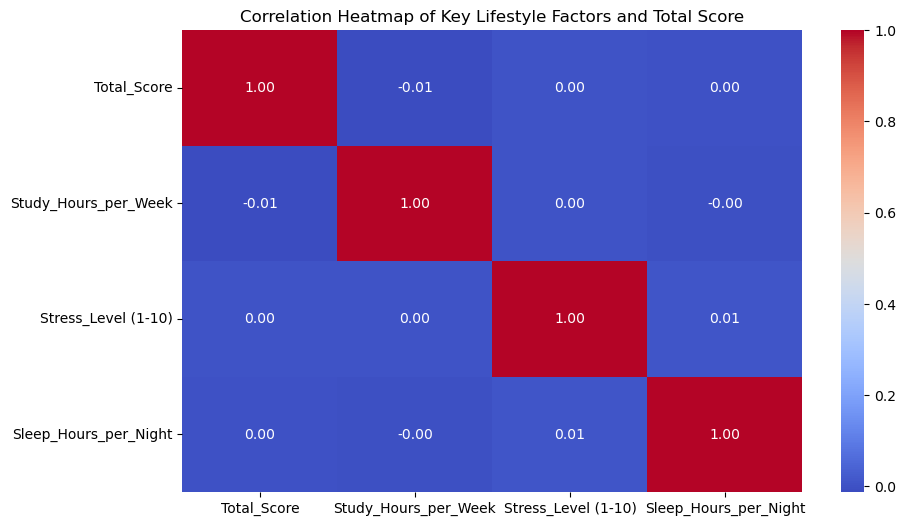

In [13]:
# Correlation matrix
correlation = data[['Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Key Lifestyle Factors and Total Score')
plt.show()

### Statistical Tests

To test if the differences in sleep hours and stress levels between high and low performers are statistically significant, I used t-tests:

In [19]:
# High and low performers
top_25 = data['Total_Score'].quantile(0.75)
bottom_25 = data['Total_Score'].quantile(0.25)

high_performers = data[data['Total_Score'] >= top_25]
low_performers = data[data['Total_Score'] <= bottom_25]

# T-test for sleep hours
sleep_ttest = ttest_ind(high_performers['Sleep_Hours_per_Night'], low_performers['Sleep_Hours_per_Night'])
print('T-test for Sleep Hours:', sleep_ttest)

# T-test for stress levels
stress_ttest = ttest_ind(high_performers['Stress_Level (1-10)'], low_performers['Stress_Level (1-10)'])
print('T-test for Stress Levels:', stress_ttest)

T-test for Sleep Hours: TtestResult(statistic=-0.22603428697619657, pvalue=0.821193245251318, df=2498.0)
T-test for Stress Levels: TtestResult(statistic=0.553682289625687, pvalue=0.5798458521613117, df=2498.0)


### Group Comparisons

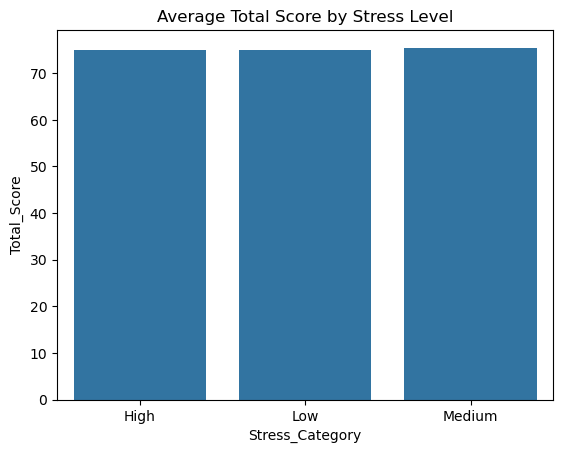

In [15]:
def categorize_stress(stress):
    if stress <= 3:
        return 'Low'
    elif stress <= 6:
        return 'Medium'
    else:
        return 'High'

data['Stress_Category'] = data['Stress_Level (1-10)'].apply(categorize_stress)

stress_group = data.groupby('Stress_Category')['Total_Score'].mean().reset_index()

sns.barplot(x='Stress_Category', y='Total_Score', data=stress_group)
plt.title('Average Total Score by Stress Level')
plt.show()

In [18]:
# Define high and low performers
top_25 = data['Total_Score'].quantile(0.75)
bottom_25 = data['Total_Score'].quantile(0.25)

high_performers = data[data['Total_Score'] >= top_25]
low_performers = data[data['Total_Score'] <= bottom_25]

print('High Performers - Average Sleep Hours:', high_performers['Sleep_Hours_per_Night'].mean())
print('Low Performers - Average Sleep Hours:', low_performers['Sleep_Hours_per_Night'].mean())

High Performers - Average Sleep Hours: 6.5
Low Performers - Average Sleep Hours: 6.5132


## NB. 

In [ ]:
For key findings about this dataset, visit the article publish in medium: https://medium.com/@ndowahmarcel/how-lifestyle-choices-affect-student-performance-a-data-driven-analysis-a6f53c912c1a